# SynthaQA Evaluation- TeapotLLM
This notebook evaluates teapotllm vs popular small language models on the SynthQA benchmark.

In [3]:
! pip install datasets
! pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 85.4 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3


In [4]:
from huggingface_hub import notebook_login

notebook_login() # Required for gated models

In [5]:
from datasets import load_dataset

# Load the Evaluation dataset
dataset = load_dataset("teapotai/synthqa").get('test').to_pandas()
dataset

# Some model completions take a long time so limiting to ~2 examples per type
# JSON questions are excluded because they are experimental
sampled_dataset = dataset[dataset['type']!="json"].groupby('type').sample(n=10, random_state=42).reset_index(drop=True)
sampled_dataset

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.30k [00:00<?, ?B/s]

train.csv:   0%|          | 0.00/8.76M [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/553k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/2533 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/240 [00:00<?, ? examples/s]

,title,context,question,type,answer,author
0,The World of Tea,"The World of Tea: A Comprehensive Guide\nTea, ...",True or False: Herbal tea is steeped for 2-3 m...,boolean,FALSE,human_reviewed
1,The World of Tea,"The World of Tea: A Comprehensive Guide\nTea, ...","Does yellow tea have a smooth, floral flavor? ...",boolean,Yes,human_reviewed
2,The World of Tea,"The World of Tea: A Comprehensive Guide\nTea, ...",True or False: White tea is fermented.,boolean,FALSE,human_reviewed
3,Landmarks RAG,The Sydney Opera House is a world-renowned per...,(T/F)- the eiffel tower and sydney opera hous...,boolean,FALSE,human_reviewed
4,Masterpieces of Art,Masterpieces of Art: A Look at Five Iconic Wor...,"True or False: Pierre-Auguste Renoir's ""Bal du...",boolean,TRUE,human_reviewed
5,The World of Tea,"The World of Tea: A Comprehensive Guide\nTea, ...",Does herbal tea come from the tea plant? (Yes/No),boolean,No,human_reviewed
6,NYC Apartment Ad,**Pet-Friendly 2 Bedroom Apartment for Rent in...,A security deposit is required to lease the ap...,boolean,Yes,human_reviewed
7,Landmarks RAG,The Statue of Liberty is a colossal sculpture ...,The statue of Liberty and the empire state bui...,boolean,Yes,human_reviewed
8,NYC Apartment Ad,**Pet-Friendly 2 Bedroom Apartment for Rent in...,The apartment provides easy access to public t...,boolean,TRUE,human_reviewed
9,Masterpieces of Art,Masterpieces of Art: A Look at Five Iconic Wor...,"Is ""Wasserschlangen II"" by Gustav Klimt an exa...",boolean,Yes,human_reviewed


In [6]:
from transformers import pipeline

# Models to evaluate in benchmark
models = {
    "teapotai/teapotllm": {
        "pipeline": pipeline("text2text-generation", model="teapotai/teapotllm"),
        "chat_mode": False
    },
    "HuggingFaceTB/SmolLM-135M-Instruct": {
        "pipeline": pipeline("text-generation", model="HuggingFaceTB/SmolLM-135M-Instruct"),
        "chat_mode": True
    },
    "HuggingFaceTB/SmolLM-360M-Instruct": {
        "pipeline": pipeline("text-generation", model="HuggingFaceTB/SmolLM-360M-Instruct"),
        "chat_mode": True
    },
    "HuggingFaceTB/SmolLM-1.7B-Instruct": {
        "pipeline": pipeline("text-generation", model="HuggingFaceTB/SmolLM-1.7B-Instruct"),
        "chat_mode": True
    },
    "meta-llama/Llama-3.2-1": {
        "pipeline": pipeline("text-generation", model="meta-llama/Llama-3.2-1B"),
        "chat_mode": False
    },
    "Qwen/Qwen2.5-0.5B-Instruct": {
        "pipeline": pipeline("text-generation", model="Qwen/Qwen2.5-0.5B-Instruct"),
        "chat_mode": True
    },
    "Qwen/Qwen2.5-1.5B-Instruct": {
        "pipeline": pipeline("text-generation", model="Qwen/Qwen2.5-1.5B-Instruct"),
        "chat_mode": True
    },
    "google/flan-t5-large": {
        "pipeline": pipeline("text2text-generation", model="google/flan-t5-large"),
        "chat_mode": False
    },
    "google/gemma-2-2b-it": {
        "pipeline": pipeline("text-generation", model="google/gemma-2-2b-it"),
        "chat_mode": True
    },
}

config.json:   0%|          | 0.00/811 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.59k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers
Device set to use cpu


config.json:   0%|          | 0.00/723 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.59k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/724M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.59k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/738 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.42G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.59k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/655 [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/843 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.47G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/185 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/659 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/988M [00:00<?, ?B/s]

Sliding Window Attention is enabled but not implemented for `sdpa`; unexpected results may be encountered.


generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

Device set to use cpu


In [7]:
# Evaluation Metrics
from sentence_transformers import SentenceTransformer, util

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

def cosine_similarity_score(text1: str, text2: str): # Used to evaluate answer similarity
    return util.pytorch_cos_sim(*embedding_model.encode([text1, text2], convert_to_tensor=True)).item()

def exact_match_score(text1: str, text2: str): # EM with lower/trim is answer in predicted
    return str(text1).lower().strip() == str(text2).lower().strip()




modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [22]:

import time
import pandas as pd
outputs = []

# Evaluate every model on every dataset example
for dataset_example in sampled_dataset.sample(frac=1).reset_index(drop=True).to_dict(orient='records'):
    for model_name, model_config in models.items():
        model_pipeline = model_config["pipeline"]
        chat_mode = model_config["chat_mode"]

        print(model_name, dataset_example.get('question'))

        # Construct prompt based on chat format
        if chat_mode:
          system_prompt = "Please answer the following question using the provided context. If you can't answer based on the provided context please apologize to the user and refuse to answer."
          prompt = [
            {"role": "user", "content": dataset_example.get('context') + "\n" + system_prompt +"\n" + dataset_example.get('question')}
          ]
        else:
            prompt = dataset_example.get('context') + "\n" + dataset_example.get('question')

        start_time = time.time()

        # Get Model Predictions
        if chat_mode:
            result = model_pipeline(prompt)[0].get('generated_text', "")[-1].get("content")
        else:
            result = model_pipeline(prompt)[0].get('generated_text', "").replace(prompt, "")

        actual = dataset_example.get('answer')
        duration = time.time() - start_time
        em = exact_match_score(result, actual)
        similarity = cosine_similarity_score(result, actual)

        print(f"Predicted: {result}")
        print(f"Actual: {actual}")
        print(f"Duration: {duration}")
        print(f"EM: {em}")
        print(f"Similarity: {similarity}")
        print("=" * 50)

        outputs.append({
            "model_name": model_name,
            "type": dataset_example.get('type'),
            "context": dataset_example.get('context'),
            "question": dataset_example.get('question'),
            "answer": dataset_example.get('answer'),
            "predicted": result,
            "em": em,
            "similarity": similarity,
            "duration": duration,
        })
    pd.DataFrame(outputs).to_csv("./metrics.csv")

teapotai/teapotllm What art movement is represented by Pierre-Auguste Renoir's "Bal du moulin de la Galette"? (One-word answer)
Predicted: Impressionism
Actual: Impressionism
Duration: 3.0880706310272217
EM: True
Refusal: False
Similarity: 1.0
HuggingFaceTB/SmolLM-135M-Instruct What art movement is represented by Pierre-Auguste Renoir's "Bal du moulin de la Galette"? (One-word answer)
Predicted: The art movement represented by Pierre-Auguste Renoir's "Bal du moulin de la Galette" is indeed Impressionism. The painting is a masterpiece of Impressionist art, characterized by
Actual: Impressionism
Duration: 3.2520480155944824
EM: False
Refusal: False
Similarity: 0.48503488302230835
HuggingFaceTB/SmolLM-360M-Instruct What art movement is represented by Pierre-Auguste Renoir's "Bal du moulin de la Galette"? (One-word answer)
Predicted: The answer is Impressionism.
Actual: Impressionism
Duration: 3.1646223068237305
EM: False
Refusal: False
Similarity: 0.7929006814956665
HuggingFaceTB/SmolLM-1

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The art movement represented by Pierre-Auguste Renoir's "Bal du moulin de la Galette" is Impressionism.
Actual: Impressionism
Duration: 17.994981288909912
EM: False
Refusal: False
Similarity: 0.5844610333442688
meta-llama/Llama-3.2-1 What art movement is represented by Pierre-Auguste Renoir's "Bal du moulin de la Galette"? (One-word answer)
Predicted:  Impressionism
What is the artist's name in "Wasserschlangen II"
Actual: Impressionism
Duration: 9.067707538604736
EM: False
Refusal: False
Similarity: 0.618151068687439
Qwen/Qwen2.5-0.5B-Instruct What art movement is represented by Pierre-Auguste Renoir's "Bal du moulin de la Galette"? (One-word answer)
Predicted: Impressionism
Actual: Impressionism
Duration: 2.8841443061828613
EM: True
Refusal: False
Similarity: 1.0
Qwen/Qwen2.5-1.5B-Instruct What art movement is represented by Pierre-Auguste Renoir's "Bal du moulin de la Galette"? (One-word answer)
Predicted: Impressionism
Actual: Impressionism
Duration: 10.369725227355957
E

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: Paris is home to some of the world's most renowned art museums, galleries, and artists. Here are the key artworks of Paris:

**Museums:**

1. **Musée
Actual: Two prominent artworks associated with Paris are:
"The Thinker" by Auguste Rodin: A bronze sculpture created in the late 19th century, originally conceived as part of Rodin's monumental work "The Gates of Hell".
"Bal du moulin de la Galette" by Pierre-Auguste Renoir: An Impressionist painting completed in 1876, showcasing Renoir's mastery of capturing the vibrant spirit of Parisian life.
Duration: 21.269571781158447
EM: False
Refusal: False
Similarity: 0.482887327671051
meta-llama/Llama-3.2-1 summarise the key artworks of Paris
Predicted: , London, and New York
summarise the key artworks of Paris, London, and New
Actual: Two prominent artworks associated with Paris are:
"The Thinker" by Auguste Rodin: A bronze sculpture created in the late 19th century, originally conceived as part of Rodin's monumental work "The Gates 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The length of the lease is 1 year.
Actual: The lease is for 1 year.
Duration: 8.484137773513794
EM: False
Refusal: True
Similarity: 0.9437047243118286
meta-llama/Llama-3.2-1 What is the length of the lease?
Predicted:  1 year
What is the security deposit? $1,000
Is there a pet fee
Actual: The lease is for 1 year.
Duration: 6.818904876708984
EM: False
Refusal: False
Similarity: 0.523612916469574
Qwen/Qwen2.5-0.5B-Instruct What is the length of the lease?
Predicted: The lease term is 1 year.
Actual: The lease is for 1 year.
Duration: 2.259874105453491
EM: False
Refusal: True
Similarity: 0.9465876817703247
Qwen/Qwen2.5-1.5B-Instruct What is the length of the lease?
Predicted: The lease term for this apartment is one year.
Actual: The lease is for 1 year.
Duration: 8.368946075439453
EM: False
Refusal: True
Similarity: 0.8643592000007629
google/flan-t5-large What is the length of the lease?
Predicted: 1 year lease
Actual: The lease is for 1 year.
Duration: 1.9198658466339111
EM: 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The optimal brewing temperature for oolong tea is between 150°F and 160°F (65°C and 71°C).
Actual: Oolong tea brews best at temperatures between 180°F and 200°F.
Duration: 21.958059072494507
EM: False
Refusal: True
Similarity: 0.93587327003479
meta-llama/Llama-3.2-1 What is the optimal brewing temperature for oolong tea?
Predicted:  The optimal brewing temperature for oolong tea is 180°F - 200°F (82°C
Actual: Oolong tea brews best at temperatures between 180°F and 200°F.
Duration: 9.408606052398682
EM: False
Refusal: True
Similarity: 0.9439647197723389
Qwen/Qwen2.5-0.5B-Instruct What is the optimal brewing temperature for oolong tea?
Predicted: The optimal brewing temperature for oolong tea is 180°F - 200
Actual: Oolong tea brews best at temperatures between 180°F and 200°F.
Duration: 4.555969953536987
EM: False
Refusal: True
Similarity: 0.9355881214141846
Qwen/Qwen2.5-1.5B-Instruct What is the optimal brewing temperature for oolong tea?
Predicted: The optimal brewing temper

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: Yes
Actual: Yes
Duration: 7.418416500091553
EM: True
Refusal: False
Similarity: 1.0
meta-llama/Llama-3.2-1 A security deposit is required to lease the apartment. Yes or No?
Predicted:  Please indicate your answer below.

Actual: Yes
Duration: 4.129364252090454
EM: False
Refusal: True
Similarity: 0.08403082937002182
Qwen/Qwen2.5-0.5B-Instruct A security deposit is required to lease the apartment. Yes or No?
Predicted: Yes
Actual: Yes
Duration: 1.5629653930664062
EM: True
Refusal: False
Similarity: 1.0
Qwen/Qwen2.5-1.5B-Instruct A security deposit is required to lease the apartment. Yes or No?
Predicted: Yes.
Actual: Yes
Duration: 6.389570236206055
EM: False
Refusal: False
Similarity: 0.8368557691574097
google/flan-t5-large A security deposit is required to lease the apartment. Yes or No?
Predicted: Yes
Actual: Yes
Duration: 1.6519649028778076
EM: True
Refusal: False
Similarity: 1.0
google/gemma-2-2b-it A security deposit is required to lease the apartment. Yes or No?
Predicte

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The optimal brewing temperature for oolong tea is between 180°F and 200°F (82°C and 93°C).
Actual: 180°F - 200°F
Duration: 21.167585849761963
EM: False
Refusal: True
Similarity: 0.20977167785167694
meta-llama/Llama-3.2-1 Get the temperature range for brewing oolong tea.
Predicted: 
Actual: 180°F - 200°F
Duration: 6.899559497833252
EM: False
Refusal: False
Similarity: 0.09896127879619598
Qwen/Qwen2.5-0.5B-Instruct Get the temperature range for brewing oolong tea.
Predicted: Based on the information provided about different types of tea, including their optimal brewing temperatures and steeping times
Actual: 180°F - 200°F
Duration: 4.541855335235596
EM: False
Refusal: True
Similarity: 0.14636872708797455
Qwen/Qwen2.5-1.5B-Instruct Get the temperature range for brewing oolong tea.
Predicted: The optimal brewing temperature for oolong tea is 180°F - 200
Actual: 180°F - 200°F
Duration: 13.656245708465576
EM: False
Refusal: True
Similarity: 0.36736494302749634
google/flan-t5-large

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The styles of art are diverse and varied, reflecting the unique perspectives and techniques of individual artists. Here are some of the most notable styles of art:

1. **Realism**: A style that
Actual: Here's a summary of the styles of art:
Abstract Expressionism: Characterized by bold, rectangular color fields that evoke emotion and depth.
Art Nouveau: Distinguished by intricate, organic patterns and symbols that exude luxury and opulence.
Impressionism: Defined by warm, vibrant colors and loose brushstrokes that capture the fleeting moments of joy and movement.
Duration: 19.65055751800537
EM: False
Refusal: False
Similarity: 0.7266573905944824
meta-llama/Llama-3.2-1 Summarize the styles of art
Predicted: , such as abstract, impressionism, and expressionism.
Art is a form of expression, and
Actual: Here's a summary of the styles of art:
Abstract Expressionism: Characterized by bold, rectangular color fields that evoke emotion and depth.
Art Nouveau: Distinguished by intrica

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: Pu-erh tea is a type of fermented tea that originated in Yunnan Province, China. It is made from the leaves of the Camellia sinensis plant, which is also used to
Actual: I regret that a detailed chemical composition analysis of pu-erh tea is not provided in the context.
Duration: 22.438880443572998
EM: False
Refusal: True
Similarity: 0.6716461181640625
meta-llama/Llama-3.2-1 What is the exact chemical composition of pu-erh tea?
Predicted: 
Actual: I regret that a detailed chemical composition analysis of pu-erh tea is not provided in the context.
Duration: 6.329577207565308
EM: False
Refusal: False
Similarity: -0.06883174180984497
Qwen/Qwen2.5-0.5B-Instruct What is the exact chemical composition of pu-erh tea?
Predicted: I'm sorry, but I don't have enough information about the specific chemical composition of pu-er
Actual: I regret that a detailed chemical composition analysis of pu-erh tea is not provided in the context.
Duration: 4.802649974822998
EM: False
Refusal: True
S

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The typical steeping time for herbal tea is 5-7 minutes.
Actual: 5-7 minutes
Duration: 16.299416542053223
EM: False
Refusal: True
Similarity: 0.3267839848995209
meta-llama/Llama-3.2-1 Extract the typical steeping time for herbal tea.
Predicted:  If you're using a tea bag, it's 5-7 minutes. If you're using
Actual: 5-7 minutes
Duration: 9.421000242233276
EM: False
Refusal: True
Similarity: 0.6213231682777405
Qwen/Qwen2.5-0.5B-Instruct Extract the typical steeping time for herbal tea.
Predicted: Based on the information provided in the context, herbal teas typically require a shorter steeping time compared to
Actual: 5-7 minutes
Duration: 4.522319078445435
EM: False
Refusal: True
Similarity: 0.13751596212387085
Qwen/Qwen2.5-1.5B-Instruct Extract the typical steeping time for herbal tea.
Predicted: According to the information provided, the typical steeping time for herbal tea is 5 - 7
Actual: 5-7 minutes
Duration: 13.910795211791992
EM: False
Refusal: True
Similarity: 0.2722709

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: What a great question!

Yes, tea plants can be genetically engineered to produce caffeine-free tea. In fact, genetic engineering has been used to develop tea plants that are naturally caffeine-free
Actual: Genetic engineering and tea plant cultivation are not discussed in the provided context.
Duration: 21.81084418296814
EM: False
Refusal: True
Similarity: 0.6066313982009888
meta-llama/Llama-3.2-1 Can tea plants be genetically engineered to produce caffeine-free tea?
Predicted:  While it is technically possible to genetically engineer tea plants to produce caffeine-free tea, this is not currently
Actual: Genetic engineering and tea plant cultivation are not discussed in the provided context.
Duration: 10.100300073623657
EM: False
Refusal: True
Similarity: 0.6834548115730286
Qwen/Qwen2.5-0.5B-Instruct Can tea plants be genetically engineered to produce caffeine-free tea?
Predicted: No, tea plants cannot be genetically engineered to produce caffeine-free tea. The production of

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The optimal brewing time for herbal tea depends on the type of herbal tea and personal preference. However, most herbal teas are best steeped for 5-7 minutes to allow the flavors and nutrients to release
Actual: Herbal tea usually steeps for 5-7 minutes.
Duration: 22.149625062942505
EM: False
Refusal: True
Similarity: 0.840887725353241
meta-llama/Llama-3.2-1 How long should herbal tea be steeped?
Predicted:  What is the best way to store it?
Actual: Herbal tea usually steeps for 5-7 minutes.
Duration: 7.756145000457764
EM: False
Refusal: False
Similarity: 0.07308938354253769
Qwen/Qwen2.5-0.5B-Instruct How long should herbal tea be steeped?
Predicted: Based on the information provided in the given text, herbal teas are not specifically mentioned as having an optimal
Actual: Herbal tea usually steeps for 5-7 minutes.
Duration: 4.701793432235718
EM: False
Refusal: True
Similarity: 0.6480231285095215
Qwen/Qwen2.5-1.5B-Instruct How long should herbal tea be steeped?
Predicted: Ac

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The pyramids were built before the Great Wall.
Actual: I'm sorry, but based on the provided context I am unable to determine if the Pyramids of Giza were built before or after the Great Wall Of China. The Great Wall of China was built as early as 7th century BC, but I do not know the date the pyramids were buillt.
Duration: 9.847056150436401
EM: False
Refusal: True
Similarity: 0.7694687843322754
meta-llama/Llama-3.2-1 Were the pyramids built before or after the Great Wall?
Predicted: 
Actual: I'm sorry, but based on the provided context I am unable to determine if the Pyramids of Giza were built before or after the Great Wall Of China. The Great Wall of China was built as early as 7th century BC, but I do not know the date the pyramids were buillt.
Duration: 5.935845136642456
EM: False
Refusal: False
Similarity: -0.046848736703395844
Qwen/Qwen2.5-0.5B-Instruct Were the pyramids built before or after the Great Wall?
Predicted: Based on the provided context, the pyramids were 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Empire State Building and the Statue of Liberty are in the same city.
Actual: Yes
Duration: 7.595256805419922
EM: False
Refusal: True
Similarity: 0.0869826003909111
meta-llama/Llama-3.2-1 The statue of Liberty and the empire state building are in the same city. Answer yes no
Predicted: 

The Statue of Liberty and the Empire State Building are located in the same city, New York,
Actual: Yes
Duration: 5.21990180015564
EM: False
Refusal: True
Similarity: 0.04679834842681885
Qwen/Qwen2.5-0.5B-Instruct The statue of Liberty and the empire state building are in the same city. Answer yes no
Predicted: Yes
Actual: Yes
Duration: 1.402984380722046
EM: True
Refusal: False
Similarity: 1.0
Qwen/Qwen2.5-1.5B-Instruct The statue of Liberty and the empire state building are in the same city. Answer yes no
Predicted: Yes.
Actual: Yes
Duration: 3.799598455429077
EM: False
Refusal: False
Similarity: 0.8368557691574097
google/flan-t5-large The statue of Liberty and the empire state building

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The apartment is pet-friendly.
Actual: Yes
Duration: 8.771421909332275
EM: False
Refusal: True
Similarity: 0.08149212598800659
meta-llama/Llama-3.2-1 Answer shortly: Is the apartment pet-friendly?
Predicted: 
Actual: Yes
Duration: 3.1410508155822754
EM: False
Refusal: False
Similarity: 0.48657459020614624
Qwen/Qwen2.5-0.5B-Instruct Answer shortly: Is the apartment pet-friendly?
Predicted: Yes, the apartment is pet-friendly.
Actual: Yes
Duration: 2.322824478149414
EM: False
Refusal: True
Similarity: 0.18662339448928833
Qwen/Qwen2.5-1.5B-Instruct Answer shortly: Is the apartment pet-friendly?
Predicted: Yes, the apartment is pet-friendly.
Actual: Yes
Duration: 7.675823926925659
EM: False
Refusal: True
Similarity: 0.18662339448928833
google/flan-t5-large Answer shortly: Is the apartment pet-friendly?
Predicted: Yes
Actual: Yes
Duration: 1.6840300559997559
EM: True
Refusal: False
Similarity: 1.0
google/gemma-2-2b-it Answer shortly: Is the apartment pet-friendly?
Predicted: Yes, 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The apartment is located near Central Park.
Actual: The apartment is located near Morningside Park.
Duration: 8.12928819656372
EM: False
Refusal: True
Similarity: 0.7075766921043396
meta-llama/Llama-3.2-1 What park is the apartment located near?
Predicted:  

Morningside Park is located just a few blocks away from the apartment. The park is a
Actual: The apartment is located near Morningside Park.
Duration: 6.892904043197632
EM: False
Refusal: True
Similarity: 0.9238311648368835
Qwen/Qwen2.5-0.5B-Instruct What park is the apartment located near?
Predicted: The apartment is located near Morningside Park.
Actual: The apartment is located near Morningside Park.
Duration: 2.4232773780822754
EM: True
Refusal: True
Similarity: 1.0000001192092896
Qwen/Qwen2.5-1.5B-Instruct What park is the apartment located near?
Predicted: The apartment is located near Morningside Park.
Actual: The apartment is located near Morningside Park.
Duration: 8.057780504226685
EM: True
Refusal: True
Simil

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The name of Pablo Picasso's painting that features a young boy holding a pipe is "Garçon à la pipe" (1905).
Actual: Pablo Picasso's painting featuring a young boy holding a pipe is "Garçon à la pipe."
Duration: 18.080522060394287
EM: False
Refusal: False
Similarity: 0.9614458084106445
meta-llama/Llama-3.2-1 What is the name of Pablo Picasso's painting that features a young boy holding a pipe?
Predicted:  (Hint: it was painted in the Blue Period)
What is the name of the painting by Gust
Actual: Pablo Picasso's painting featuring a young boy holding a pipe is "Garçon à la pipe."
Duration: 10.114359617233276
EM: False
Refusal: False
Similarity: 0.4020785987377167
Qwen/Qwen2.5-0.5B-Instruct What is the name of Pablo Picasso's painting that features a young boy holding a pipe?
Predicted: Based on the provided context, the name of Pablo Picasso's painting that features a young boy holding a
Actual: Pablo Picasso's painting featuring a young boy holding a pipe is "Garçon à la pipe.

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: True
Actual: TRUE
Duration: 6.767646312713623
EM: True
Refusal: False
Similarity: 1.0
meta-llama/Llama-3.2-1 The apartment provides easy access to public transportation. True or False?
Predicted: 
Actual: TRUE
Duration: 3.6426022052764893
EM: False
Refusal: False
Similarity: 0.3902861773967743
Qwen/Qwen2.5-0.5B-Instruct The apartment provides easy access to public transportation. True or False?
Predicted: True. The apartment is located in a prime area within walking distance to beautiful Morningside Park,
Actual: TRUE
Duration: 3.28944730758667
EM: False
Refusal: True
Similarity: 0.13927432894706726
Qwen/Qwen2.5-1.5B-Instruct The apartment provides easy access to public transportation. True or False?
Predicted: True. According to the description, the apartment is located within walking distance to the Morningside Park
Actual: TRUE
Duration: 10.070196628570557
EM: False
Refusal: True
Similarity: 0.17230740189552307
google/flan-t5-large The apartment provides easy access to pu

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The answer is:
Mark Rothko's "No. 6 (Violet, Green and Red)"
Actual: "No. 6 (Violet, Green and Red)" by Mark Rothko is a stunning example of abstract expressionism.
Duration: 16.200793981552124
EM: False
Refusal: False
Similarity: 0.5342639684677124
meta-llama/Llama-3.2-1 Which piece is an example of abstract expressionism?
Predicted:  "No. 6 (Violet, Green and Red)" by Mark Rothko
What is
Actual: "No. 6 (Violet, Green and Red)" by Mark Rothko is a stunning example of abstract expressionism.
Duration: 9.706802606582642
EM: False
Refusal: False
Similarity: 0.5843477249145508
Qwen/Qwen2.5-0.5B-Instruct Which piece is an example of abstract expressionism?
Predicted: Based on the provided context, "No. 6 (Violet, Green and Red)" by
Actual: "No. 6 (Violet, Green and Red)" by Mark Rothko is a stunning example of abstract expressionism.
Duration: 4.706207036972046
EM: False
Refusal: False
Similarity: 0.5492640733718872
Qwen/Qwen2.5-1.5B-Instruct Which piece is an example of abstrac

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: True.
Actual: TRUE
Duration: 11.861843824386597
EM: False
Refusal: False
Similarity: 0.8352776765823364
meta-llama/Llama-3.2-1 True or False: Pierre-Auguste Renoir's "Bal du moulin de la Galette" is an example of Impressionism.
Predicted: 
Actual: TRUE
Duration: 6.582659482955933
EM: False
Refusal: False
Similarity: 0.3902861773967743
Qwen/Qwen2.5-0.5B-Instruct True or False: Pierre-Auguste Renoir's "Bal du moulin de la Galette" is an example of Impressionism.
Predicted: False. "Bal du moulin de la Galette" by Pierre-Auguste Renoir is an
Actual: TRUE
Duration: 5.156079053878784
EM: False
Refusal: True
Similarity: 0.02931385487318039
Qwen/Qwen2.5-1.5B-Instruct True or False: Pierre-Auguste Renoir's "Bal du moulin de la Galette" is an example of Impressionism.
Predicted: True.
Actual: TRUE
Duration: 9.781592845916748
EM: False
Refusal: False
Similarity: 0.8352776765823364
google/flan-t5-large True or False: Pierre-Auguste Renoir's "Bal du moulin de la Galette" is an example of

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The age-old question about tea and longevity!

While there isn't a straightforward, definitive answer to this question, I'll provide some insights based on existing research and studies. Keep in mind
Actual: There is no information in the context regarding the relationship between tea consumption and life expectancy.
Duration: 22.293328523635864
EM: False
Refusal: True
Similarity: 0.5963671803474426
meta-llama/Llama-3.2-1 Is there a direct correlation between tea consumption and increased life expectancy?
Predicted:  The answer is a resounding yes. In fact, several studies have shown that regular tea consumption can
Actual: There is no information in the context regarding the relationship between tea consumption and life expectancy.
Duration: 9.48038649559021
EM: False
Refusal: True
Similarity: 0.5238007307052612
Qwen/Qwen2.5-0.5B-Instruct Is there a direct correlation between tea consumption and increased life expectancy?
Predicted: Yes, there is a clear and established sci

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The last name of Gustav Klimt is Klimt.
Actual: Gustav's last name is Klimt.
Duration: 14.063112258911133
EM: False
Refusal: False
Similarity: 0.9269859790802002
meta-llama/Llama-3.2-1 What is Gustav's last name?
Predicted: 
Actual: Gustav's last name is Klimt.
Duration: 6.05445122718811
EM: False
Refusal: False
Similarity: 0.08494039624929428
Qwen/Qwen2.5-0.5B-Instruct What is Gustav's last name?
Predicted: Gustav's last name is Klimt.
Actual: Gustav's last name is Klimt.
Duration: 3.7159247398376465
EM: True
Refusal: False
Similarity: 1.0
Qwen/Qwen2.5-1.5B-Instruct What is Gustav's last name?
Predicted: Gustav's last name is Klimt.
Actual: Gustav's last name is Klimt.
Duration: 11.735042572021484
EM: True
Refusal: False
Similarity: 1.0
google/flan-t5-large What is Gustav's last name?
Predicted: Klimt
Actual: Gustav's last name is Klimt.
Duration: 2.9851367473602295
EM: False
Refusal: False
Similarity: 0.5727322697639465
google/gemma-2-2b-it What is Gustav's last name?
Pred

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Kremlin is a fortified complex located in the heart of Moscow, Russia. It serves as the official residence of the Russian president and includes several palaces, cathedrals, and government buildings. The K
Actual: The Kremlin is a fortified complex located in the heart of Moscow, Russia. It serves as the official residence of the Russian president and includes several palaces, cathedrals, and government buildings. The Kremlin has been the seat of Russian power for centuries, from Tsarist Russia to the Soviet Union and modern Russia. It is a UNESCO World Heritage site and a key symbol of Russian political and historical significance.
Duration: 10.479013442993164
EM: False
Refusal: False
Similarity: 0.9518746733665466
meta-llama/Llama-3.2-1 Tell me about the kremlin
Predicted: .
The Kremlin is a historic fortress complex in Moscow, Russia. It is the official residence of the
Actual: The Kremlin is a fortified complex located in the heart of Moscow, Russia. It serves as the

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The eiffel tower and Sydney Opera House are not in the same country. The eiffel tower is located in Paris, France, while the Sydney Opera House is located in Sydney, Australia.
Actual: FALSE
Duration: 14.25946593284607
EM: False
Refusal: True
Similarity: -0.020152272656559944
meta-llama/Llama-3.2-1 (T/F)-  the eiffel tower and sydney opera house are in the same country
Predicted: 
(T/F)-  the eiffel tower and sydney opera house are in the same continent
Actual: FALSE
Duration: 5.934936285018921
EM: False
Refusal: True
Similarity: 0.05631130188703537
Qwen/Qwen2.5-0.5B-Instruct (T/F)-  the eiffel tower and sydney opera house are in the same country
Predicted: To determine if the statement "the Eiffel Tower and Sydney Opera House are in the same country
Actual: FALSE
Duration: 3.7599575519561768
EM: False
Refusal: True
Similarity: 0.13603472709655762
Qwen/Qwen2.5-1.5B-Instruct (T/F)-  the eiffel tower and sydney opera house are in the same country
Predicted: T. The Eiffel Tower

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The medium used by Mark Rothko for "No. 6 (Violet, Green and Red)" is oil on canvas.
Actual: Oil on canvas
Duration: 16.97344160079956
EM: False
Refusal: False
Similarity: 0.752971887588501
meta-llama/Llama-3.2-1 xtract the medium used by Mark Rothko for "No. 6 (Violet, Green and Red)".
Predicted: 
Actual: Oil on canvas
Duration: 5.519687175750732
EM: False
Refusal: False
Similarity: 0.09913340210914612
Qwen/Qwen2.5-0.5B-Instruct xtract the medium used by Mark Rothko for "No. 6 (Violet, Green and Red)".
Predicted: Mark Rothko's "No. 6 (Violet, Green and Red)" is an oil
Actual: Oil on canvas
Duration: 5.109873294830322
EM: False
Refusal: False
Similarity: 0.36571910977363586
Qwen/Qwen2.5-1.5B-Instruct xtract the medium used by Mark Rothko for "No. 6 (Violet, Green and Red)".
Predicted: The medium used by Mark Rothko for "No. 6 (Violet, Green and Red
Actual: Oil on canvas
Duration: 13.475501537322998
EM: False
Refusal: False
Similarity: 0.2029716819524765
google/flan-t5-large 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The article discusses the different types of tea, including black tea, green tea, oolong tea, white tea, pu-erh tea, and herbal tea. Each type of tea has its
Actual: Here's an overview of the different types of tea discussed in the article:
1. Black Tea
Origin: India, Sri Lanka, Kenya, and China
Optimal brewing temperature: 200°F - 212°F (93°C - 100°C)
Steeping time: 3 - 5 minutes
Description: Black tea is fermented, which gives it its characteristic strong flavor and dark color. Popular varieties include Earl Grey, English Breakfast, and Darjeeling.
2. Green Tea
Origin: China, Japan, and Korea
Optimal brewing temperature: 160°F - 170°F (71°C - 77°C)
Steeping time: 2 - 3 minutes
Description: Green tea is steamed or pan-fried, preserving its antioxidants and giving it a light, refreshing taste. Popular varieties include Sencha, Dragon Well, and Matcha.
3. Oolong Tea
Origin: Taiwan
Optimal brewing temperature: 180°F - 200°F (82°C - 93°C)
Steeping time: 3 - 5 minutes
Descriptio

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The 2-bedroom apartment is a spacious and convenient living space that offers a range of key features and amenities. Here are some of the most notable ones:

**Key Features:**


Actual: The 2-bedroom apartment features 2 large bedrooms with plenty of natural light, 1 bathroom with modern fixtures, and a small backyard perfect for relaxing or entertaining. Additionally, the apartment has an in-unit washer/dryer for added convenience. The apartment's prime location offers easy access to public transportation via the 1 and B trains and is within walking distance to beautiful Morningside Park.
Duration: 16.36452841758728
EM: False
Refusal: True
Similarity: 0.7223867177963257
meta-llama/Llama-3.2-1 Tell me about the key features and amenities of the 2-bedroom apartment.
Predicted:  What do you like about it?

What do you like about the location? Is it close to the
Actual: The 2-bedroom apartment features 2 large bedrooms with plenty of natural light, 1 bathroom with modern fixtur

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Death Star is a massive space station that serves as the capital ship of the Galactic Empire in the Star Wars universe. It is a heavily armored, spherical space station with a diameter of approximately 
Actual: Sorry, I don't seem to have any information on the size of the Death Star.
Duration: 15.866524934768677
EM: False
Refusal: True
Similarity: 0.645720362663269
meta-llama/Llama-3.2-1 how big is the Death Star
Predicted:  in feet
The Death Star is a fictional spacecraft featured in the Star Wars franchise. It was designed
Actual: Sorry, I don't seem to have any information on the size of the Death Star.
Duration: 6.940080642700195
EM: False
Refusal: True
Similarity: 0.43573588132858276
Qwen/Qwen2.5-0.5B-Instruct how big is the Death Star
Predicted: Based on the information provided, I cannot accurately determine the size or dimensions of the Death Star. The
Actual: Sorry, I don't seem to have any information on the size of the Death Star.
Duration: 3.637544631958008


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Thinker is a sculpture by Auguste Rodin, cast in bronze.
Actual: The Thinker is cast in bronze.
Duration: 15.261026382446289
EM: False
Refusal: False
Similarity: 0.7470625638961792
meta-llama/Llama-3.2-1 what is the Thinker cast in?
Predicted: 
Actual: The Thinker is cast in bronze.
Duration: 5.819195747375488
EM: False
Refusal: False
Similarity: 0.0705062597990036
Qwen/Qwen2.5-0.5B-Instruct what is the Thinker cast in?
Predicted: I'm sorry, but I do not have any information about a "Thinker" cast in any
Actual: The Thinker is cast in bronze.
Duration: 4.3131773471832275
EM: False
Refusal: False
Similarity: 0.6613454222679138
Qwen/Qwen2.5-1.5B-Instruct what is the Thinker cast in?
Predicted: The Thinker is cast in bronze.
Actual: The Thinker is cast in bronze.
Duration: 10.935211420059204
EM: True
Refusal: False
Similarity: 1.0000001192092896
google/flan-t5-large what is the Thinker cast in?
Predicted: bronze
Actual: The Thinker is cast in bronze.
Duration: 3.14896464347

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: Pablo Picasso was inspired by the works of the Impressionist artists, particularly Claude Monet and Camille Pissarro. He was particularly drawn to their use of light and color to capture the fleeting effects
Actual: Sorry, I don't seem to have any information about that.
Duration: 21.013355493545532
EM: False
Refusal: False
Similarity: -0.013124022632837296
meta-llama/Llama-3.2-1 Where did Pablo Picasso get the inspiration for "Garçon à la pipe"?
Predicted:  The artist was inspired by the poverty and suffering he saw in Barcelona during the Spanish Civil War. How
Actual: Sorry, I don't seem to have any information about that.
Duration: 8.793262720108032
EM: False
Refusal: False
Similarity: 0.07447190582752228
Qwen/Qwen2.5-0.5B-Instruct Where did Pablo Picasso get the inspiration for "Garçon à la pipe"?
Predicted: Sorry, but I can't assist with that.
Actual: Sorry, I don't seem to have any information about that.
Duration: 3.914194107055664
EM: False
Refusal: True
Similarity:

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Tate Modern is home to Mark Rothko's "No. 6 (Violet, Green and Red)".
Actual: Mark Rothko's "No. 6 (Violet, Green and Red)" is housed at the Tate Modern in London.
Duration: 16.222239017486572
EM: False
Refusal: False
Similarity: 0.9081283807754517
meta-llama/Llama-3.2-1 Which museum is home to Mark Rothko's "No. 6 (Violet, Green and Red)"?
Predicted:  (Hint: it's not the Whitney Museum)
The answer is the Whitney Museum of American Art in
Actual: Mark Rothko's "No. 6 (Violet, Green and Red)" is housed at the Tate Modern in London.
Duration: 9.327601432800293
EM: False
Refusal: True
Similarity: 0.21113848686218262
Qwen/Qwen2.5-0.5B-Instruct Which museum is home to Mark Rothko's "No. 6 (Violet, Green and Red)"?
Predicted: According to the information provided, Mark Rothko's "No. 6 (Violet, Green
Actual: Mark Rothko's "No. 6 (Violet, Green and Red)" is housed at the Tate Modern in London.
Duration: 4.3832433223724365
EM: False
Refusal: False
Similarity: 0.6819957494735718
Q

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: Mark Rothko (1903-1970) was an American abstract expressionist painter known for his large-scale, color-field paintings. He is considered one of the most
Actual: Mark Rothko is a renowned artist known for his work in abstract expressionism. His artistic style is characterized by the use of large, rectangular fields of color that evoke a sense of depth and emotion. Rothko's masterful use of color and composition has created some truly iconic pieces. One of his notable works, "No. 6 (Violet, Green and Red)", is oil on canvas and is currently located at the Tate Modern in London.
Duration: 20.398672342300415
EM: False
Refusal: False
Similarity: 0.7104848027229309
meta-llama/Llama-3.2-1 Tell me about Mark Rothko
Predicted: 
Mark Rothko was an American painter who created a unique style of abstract expressionism. He is
Actual: Mark Rothko is a renowned artist known for his work in abstract expressionism. His artistic style is characterized by the use of large, rectangular fields 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The age-old quest for a cure! While tea has been touted as a potential remedy for various health issues, including Alzheimer's disease, the evidence is not yet conclusive. Here's a breakdown of
Actual: The provided context focuses on general tea information and does not delve into medical applications or potential health benefits.
Duration: 21.795071125030518
EM: False
Refusal: True
Similarity: 0.570088267326355
meta-llama/Llama-3.2-1 Can tea be used as a potential treatment for Alzheimer's disease?
Predicted:  - 2023-02-22
How to make a cup of tea - 2023
Actual: The provided context focuses on general tea information and does not delve into medical applications or potential health benefits.
Duration: 9.336435556411743
EM: False
Refusal: True
Similarity: 0.2063179910182953
Qwen/Qwen2.5-0.5B-Instruct Can tea be used as a potential treatment for Alzheimer's disease?
Predicted: Based on the information provided, there isn't enough evidence to support the claim that tea can be u

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Sydney Opera House is a world-renowned performing arts center located in Sydney, Australia. Completed in 1973, the building is famous for its unique sail-like design and
Actual: The Sydney Opera House is a world-renowned performing arts center located in Sydney, Australia. It is famous for its unique sail-like design and stunning location on Sydney Harbour. Completed in 1973, the building is one of the most recognizable architectural landmarks in the world.
Duration: 12.651571273803711
EM: False
Refusal: True
Similarity: 0.9733375310897827
meta-llama/Llama-3.2-1 Please descrive the Sydney Opera House in detail
Predicted: . What is its architecture? What is its history? How many floors does it have? What are
Actual: The Sydney Opera House is a world-renowned performing arts center located in Sydney, Australia. It is famous for its unique sail-like design and stunning location on Sydney Harbour. Completed in 1973, the building is one of the most recognizable architectural 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Great Wall of China is approximately 13,170 miles (21,196 kilometers) long.
Actual: None
Duration: 7.832006216049194
EM: False
Refusal: True
Similarity: 0.06016366556286812
meta-llama/Llama-3.2-1 Extract the length of the great wall of china in meters
Predicted: 
The Great Wall of China is a historic fortification that stretches over 13,000 miles.
Actual: None
Duration: 4.72950553894043
EM: False
Refusal: True
Similarity: 0.05000491812825203
Qwen/Qwen2.5-0.5B-Instruct Extract the length of the great wall of china in meters
Predicted: The length of the Great Wall of China is approximately 13,000 miles. To
Actual: None
Duration: 2.3207409381866455
EM: False
Refusal: True
Similarity: 0.058642856776714325
Qwen/Qwen2.5-1.5B-Instruct Extract the length of the great wall of china in meters
Predicted: The Great Wall of China spans approximately 13,170 kilometers (8,15
Actual: None
Duration: 5.9007322788238525
EM: False
Refusal: True
Similarity: 0.08810670673847198
google/flan-t5

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The type of tea that is known for its digestive benefits is Pu-erh tea.
Actual: Pu-erh tea
Duration: 16.96655583381653
EM: False
Refusal: True
Similarity: 0.7988125681877136
meta-llama/Llama-3.2-1 Find the type of tea that is known for its digestive benefits.
Predicted: 
Actual: Pu-erh tea
Duration: 5.94028115272522
EM: False
Refusal: False
Similarity: 0.17840895056724548
Qwen/Qwen2.5-0.5B-Instruct Find the type of tea that is known for its digestive benefits.
Predicted: Pu-erh tea is known for its digestive benefits.
Actual: Pu-erh tea
Duration: 3.786957025527954
EM: False
Refusal: True
Similarity: 0.7862135171890259
Qwen/Qwen2.5-1.5B-Instruct Find the type of tea that is known for its digestive benefits.
Predicted: Pu-erh Tea is known for its digestive benefits.
Actual: Pu-erh tea
Duration: 12.15034556388855
EM: False
Refusal: True
Similarity: 0.7862135171890259
google/flan-t5-large Find the type of tea that is known for its digestive benefits.
Predicted: Learn about the d

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: Auguste Rodin created 21 versions of "The Thinker" during his lifetime.
Actual: I am not sure how many versions were created.
Duration: 15.316834926605225
EM: False
Refusal: False
Similarity: 0.24765437841415405
meta-llama/Llama-3.2-1 How many versions of "The Thinker" did Auguste Rodin create?
Predicted: 
Actual: I am not sure how many versions were created.
Duration: 5.465456008911133
EM: False
Refusal: False
Similarity: 0.09155967831611633
Qwen/Qwen2.5-0.5B-Instruct How many versions of "The Thinker" did Auguste Rodin create?
Predicted: According to the information provided, Auguste Rodin created only one version of "The Thinker."
Actual: I am not sure how many versions were created.
Duration: 5.089143514633179
EM: False
Refusal: False
Similarity: 0.22379134595394135
Qwen/Qwen2.5-1.5B-Instruct How many versions of "The Thinker" did Auguste Rodin create?
Predicted: Based on the information provided in the context, there were no specific details given about how many version

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The pyramids of Giza were constructed by the ancient Egyptians during the Old Kingdom period, specifically during the reign of Pharaoh Khufu (2589-2566 BC).
Actual: The Egyptians constructed the Pyramids of Giza for Pharaoh Khufu.
Duration: 15.989107608795166
EM: False
Refusal: True
Similarity: 0.9245033264160156
meta-llama/Llama-3.2-1 Who constructed the pyramids of giza
Predicted: 
Who constructed the pyramids of giza
Who constructed the pyramids of giza
Who
Actual: The Egyptians constructed the Pyramids of Giza for Pharaoh Khufu.
Duration: 7.505531549453735
EM: False
Refusal: True
Similarity: 0.8458793759346008
Qwen/Qwen2.5-0.5B-Instruct Who constructed the pyramids of giza
Predicted: Based on the information provided:

- The Great Pyramid was built for Pharaoh Khufu.
-
Actual: The Egyptians constructed the Pyramids of Giza for Pharaoh Khufu.
Duration: 3.630295991897583
EM: False
Refusal: True
Similarity: 0.8165183067321777
Qwen/Qwen2.5-1.5B-Instruct Who constructed the p

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: Herbal tea comes from the tea plant.
Actual: No
Duration: 14.845708131790161
EM: False
Refusal: True
Similarity: -0.05220973491668701
meta-llama/Llama-3.2-1 Does herbal tea come from the tea plant? (Yes/No)
Predicted: 
Actual: No
Duration: 7.008528709411621
EM: False
Refusal: False
Similarity: 0.5032032132148743
Qwen/Qwen2.5-0.5B-Instruct Does herbal tea come from the tea plant? (Yes/No)
Predicted: Yes. Herbs, fruits, and flowers are used as teas in various countries and regions, including
Actual: No
Duration: 4.484424352645874
EM: False
Refusal: True
Similarity: 0.09900898486375809
Qwen/Qwen2.5-1.5B-Instruct Does herbal tea come from the tea plant? (Yes/No)
Predicted: No.
Actual: No
Duration: 9.76717209815979
EM: False
Refusal: False
Similarity: 0.8128345012664795
google/flan-t5-large Does herbal tea come from the tea plant? (Yes/No)
Predicted: No
Actual: No
Duration: 3.235948085784912
EM: True
Refusal: False
Similarity: 1.000000238418579
google/gemma-2-2b-it Does herbal te

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: False.
Actual: FALSE
Duration: 14.10566520690918
EM: False
Refusal: False
Similarity: 0.8589172959327698
meta-llama/Llama-3.2-1 True or False: White tea is fermented.
Predicted: 
Actual: FALSE
Duration: 6.869505882263184
EM: False
Refusal: False
Similarity: 0.3053726553916931
Qwen/Qwen2.5-0.5B-Instruct True or False: White tea is fermented.
Predicted: False. White tea is not fermented; it is made from the young buds of the tea plant and
Actual: FALSE
Duration: 4.60978889465332
EM: False
Refusal: True
Similarity: 0.1529822051525116
Qwen/Qwen2.5-1.5B-Instruct True or False: White tea is fermented.
Predicted: False. According to the information provided, white tea is not fermented. It is made from the young
Actual: FALSE
Duration: 13.922152280807495
EM: False
Refusal: True
Similarity: 0.18122988939285278
google/flan-t5-large True or False: White tea is fermented.
Predicted: False
Actual: FALSE
Duration: 4.141893625259399
EM: True
Refusal: False
Similarity: 1.0000001192092896
go

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: Yes. "Wasserschlangen II" by Gustav Klimt is an example of Art Nouveau.
Actual: Yes
Duration: 16.92296290397644
EM: False
Refusal: False
Similarity: 0.21924376487731934
meta-llama/Llama-3.2-1 Is "Wasserschlangen II" by Gustav Klimt an example of Art Nouveau? Yes/No
Predicted: 
Is "Garçon à la pipe" by Pablo Picasso an example of the Blue Period? Yes
Actual: Yes
Duration: 8.719736576080322
EM: False
Refusal: False
Similarity: 0.09678545594215393
Qwen/Qwen2.5-0.5B-Instruct Is "Wasserschlangen II" by Gustav Klimt an example of Art Nouveau? Yes/No
Predicted: Yes. "Wasserschlangen II" by Gustav Klimt is indeed an
Actual: Yes
Duration: 4.989407539367676
EM: False
Refusal: True
Similarity: 0.23211009800434113
Qwen/Qwen2.5-1.5B-Instruct Is "Wasserschlangen II" by Gustav Klimt an example of Art Nouveau? Yes/No
Predicted: Yes.
Actual: Yes
Duration: 9.178566932678223
EM: False
Refusal: False
Similarity: 0.8368557691574097
google/flan-t5-large Is "Wasserschlangen II" by Gustav Klimt an 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: Yellow tea has a smooth, floral flavor.
Actual: Yes
Duration: 14.811138391494751
EM: False
Refusal: True
Similarity: 0.012403801083564758
meta-llama/Llama-3.2-1 Does yellow tea have a smooth, floral flavor? (Yes/No)
Predicted:  Does yellow tea have a smooth, floral flavor? (Yes/No)
What is the best temperature
Actual: Yes
Duration: 10.103024959564209
EM: False
Refusal: True
Similarity: 0.03240339457988739
Qwen/Qwen2.5-0.5B-Instruct Does yellow tea have a smooth, floral flavor? (Yes/No)
Predicted: No.
Actual: Yes
Duration: 2.8602511882781982
EM: False
Refusal: False
Similarity: 0.6049202084541321
Qwen/Qwen2.5-1.5B-Instruct Does yellow tea have a smooth, floral flavor? (Yes/No)
Predicted: Yes.
Actual: Yes
Duration: 9.937374114990234
EM: False
Refusal: False
Similarity: 0.8368557691574097
google/flan-t5-large Does yellow tea have a smooth, floral flavor? (Yes/No)
Predicted: Yellow tea is lightly fermented, giving it a smooth, floral flavor
Actual: Yes
Duration: 4.46052765846252

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The context provided is a description of a 2 bedroom apartment in a 1-bedroom apartment complex in a great location in New York City. The apartment is pet-friendly, which means that
Actual: The apartment has a pet-friendly policy, welcoming dogs, cats, and other furry friends to join their owners in their new home. However, specific details regarding pet deposits, breed or size restrictions, weight limits, and rules or regulations are not provided and would likely be discussed with the landlord or property manager during the rental application process.
Duration: 15.138551473617554
EM: False
Refusal: False
Similarity: 0.586803138256073
meta-llama/Llama-3.2-1 Descirbe the details of the pet policy
Predicted: :

* No dogs or cats allowed
* Please provide a copy of your pet's vaccination records and
Actual: The apartment has a pet-friendly policy, welcoming dogs, cats, and other furry friends to join their owners in their new home. However, specific details regarding pet deposit

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Irishman who discovered Stonehenge is a mystery. There is no record of an Irishman discovering Stonehenge, and it is unlikely that an Irishman would have traveled to England to visit the monument. Additionally
Actual: I'm sorry, I don't appear to have any lnowledge about who discovered Stonehenge.
Duration: 12.907297849655151
EM: False
Refusal: True
Similarity: 0.7233849167823792
meta-llama/Llama-3.2-1 Did an irishman discover stone henge
Predicted: ? - Quora

The Great Wall of China is a massive structure that stretches for 13,
Actual: I'm sorry, I don't appear to have any lnowledge about who discovered Stonehenge.
Duration: 5.86628532409668
EM: False
Refusal: True
Similarity: 0.1941601037979126
Qwen/Qwen2.5-0.5B-Instruct Did an irishman discover stone henge
Predicted: I'm sorry, but I don't have enough information about Irish people to be able to determine if
Actual: I'm sorry, I don't appear to have any lnowledge about who discovered Stonehenge.
Duration: 2.7029776573

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The economic impact of the tea industry on rural communities in India is significant. Tea is one of the largest export commodities from India, with a global market worth over $100 billion. The industry
Actual: Sorry, but the economic impact of the tea industry on rural communities is not explored in the given context.
Duration: 21.791841745376587
EM: False
Refusal: True
Similarity: 0.691623866558075
meta-llama/Llama-3.2-1 What is the economic impact of the tea industry on rural communities in India?
Predicted:  The tea industry is a significant economic contributor to rural communities in India. It provides employment opportunities, generates
Actual: Sorry, but the economic impact of the tea industry on rural communities is not explored in the given context.
Duration: 9.763217449188232
EM: False
Refusal: True
Similarity: 0.6949830055236816
Qwen/Qwen2.5-0.5B-Instruct What is the economic impact of the tea industry on rural communities in India?
Predicted: Sorry, but I can't a

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: True
Actual: FALSE
Duration: 12.79857349395752
EM: False
Refusal: False
Similarity: 0.5061649084091187
meta-llama/Llama-3.2-1 True or False: Herbal tea is steeped for 2-3 minutes.
Predicted: 
Actual: FALSE
Duration: 6.0720930099487305
EM: False
Refusal: False
Similarity: 0.3053726553916931
Qwen/Qwen2.5-0.5B-Instruct True or False: Herbal tea is steeped for 2-3 minutes.
Predicted: False. The statement "Herbal tea is steeped for 2-3 minutes" is false
Actual: FALSE
Duration: 5.272948741912842
EM: False
Refusal: True
Similarity: 0.3648127615451813
Qwen/Qwen2.5-1.5B-Instruct True or False: Herbal tea is steeped for 2-3 minutes.
Predicted: False. The context states that herbal tea should be steeped for 5-7 minutes, not
Actual: FALSE
Duration: 13.690352439880371
EM: False
Refusal: True
Similarity: 0.23344531655311584
google/flan-t5-large True or False: Herbal tea is steeped for 2-3 minutes.
Predicted: False
Actual: FALSE
Duration: 3.3456430435180664
EM: True
Refusal: False
Similari

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The neighborhood where the apartment is located is called the "East Village" in New York City. It's a vibrant and diverse neighborhood with a rich history, known for its street art, independent shops,
Actual: 
According to the listing, the apartment is located in a vibrant and diverse neighborhood in NYC, within walking distance to beautiful Morningside Park. The area is described as having a variety of restaurants, shops, and cultural attractions nearby. Additionally, the neighborhood has easy access to public transportation via the 1 and B trains.
Duration: 14.93524169921875
EM: False
Refusal: False
Similarity: 0.6027745604515076
meta-llama/Llama-3.2-1 Tell me about the neighborhood where the apartment is located.
Predicted:  Tell me about the apartment. Tell me about the neighborhood where the apartment is located. Tell me about
Actual: 
According to the listing, the apartment is located in a vibrant and diverse neighborhood in NYC, within walking distance to beautiful Mo

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The monthly rent for the apartment is $2,000.
Actual: $2,000
Duration: 9.402397632598877
EM: False
Refusal: True
Similarity: 0.42673832178115845
meta-llama/Llama-3.2-1 Output the monthly rent for the apartment.
Predicted:  The monthly rent is $2000.

```python
output = rent
print(output)
```


Actual: $2,000
Duration: 6.915278911590576
EM: False
Refusal: False
Similarity: 0.2632717788219452
Qwen/Qwen2.5-0.5B-Instruct Output the monthly rent for the apartment.
Predicted: The monthly rent for the apartment is $2000.
Actual: $2,000
Duration: 2.703313112258911
EM: False
Refusal: False
Similarity: 0.34259843826293945
Qwen/Qwen2.5-1.5B-Instruct Output the monthly rent for the apartment.
Predicted: The monthly rent for the apartment is $2000.
Actual: $2,000
Duration: 8.681782960891724
EM: False
Refusal: False
Similarity: 0.34259843826293945
google/flan-t5-large Output the monthly rent for the apartment.
Predicted: $2000
Actual: $2,000
Duration: 1.697690725326538
EM: False
Refusal: 

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Taj Mahal is a stunning white marble mausoleum located in Agra, India. Built by Emperor Shah Jahan in memory of his wife Mumtaz Mahal, it is considered one of the
Actual: The Taj Mahal is a stunning white marble mausoleum located in Agra, India. It was built by Emperor Shah Jahan in memory of his wife, Mumtaz Mahal, and is considered one of the finest examples of Mughal architecture. The Taj Mahal is renowned for its intricate designs, including detailed carvings and inlaid gemstones. This magnificent structure is not only a testament to love but also a significant historical landmark, recognized as a UNESCO World Heritage site, and attracting millions of visitors annually.
Duration: 13.435644388198853
EM: False
Refusal: True
Similarity: 0.9453465342521667
meta-llama/Llama-3.2-1 Can you educate me about taj mahal?
Predicted:  Can you educate me about pyramids of giza? Can you educate me about machu picchu
Actual: The Taj Mahal is a stunning white marble mausoleum located

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The Sahara Desert is the largest hot desert in the world, located in North Africa.
Actual: North Africa
Duration: 7.862192869186401
EM: False
Refusal: True
Similarity: 0.4572896361351013
meta-llama/Llama-3.2-1 Output the region of the sahara
Predicted:  desert

The Sahara Desert is a vast, inhospitable region located in North Africa. It is
Actual: North Africa
Duration: 4.846851348876953
EM: False
Refusal: True
Similarity: 0.5080850720405579
Qwen/Qwen2.5-0.5B-Instruct Output the region of the sahara
Predicted: The Sahara Desert is located in North Africa.
Actual: North Africa
Duration: 1.7753572463989258
EM: False
Refusal: True
Similarity: 0.6025229692459106
Qwen/Qwen2.5-1.5B-Instruct Output the region of the sahara
Predicted: The Sahara Desert is located in North Africa.
Actual: North Africa
Duration: 5.3508336544036865
EM: False
Refusal: True
Similarity: 0.6025229692459106
google/flan-t5-large Output the region of the sahara
Predicted: North Africa
Actual: North Africa
Dur

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


Predicted: The ideal temperature range for brewing black tea is between 160°F and 170°F (71°C and 77°C).
Actual: 200°F - 212°F
Duration: 20.803799867630005
EM: False
Refusal: True
Similarity: 0.31958717107772827
meta-llama/Llama-3.2-1 Extract the ideal temperature range for brewing black tea.
Predicted:  Start with 200 degrees Fahrenheit, which is the optimal temperature for most black teas, and gradually increase
Actual: 200°F - 212°F
Duration: 9.648810625076294
EM: False
Refusal: True
Similarity: 0.36485087871551514
Qwen/Qwen2.5-0.5B-Instruct Extract the ideal temperature range for brewing black tea.
Predicted: The optimal temperature range for brewing black tea is 200°F - 212°F
Actual: 200°F - 212°F
Duration: 5.36875581741333
EM: False
Refusal: True
Similarity: 0.4351731538772583
Qwen/Qwen2.5-1.5B-Instruct Extract the ideal temperature range for brewing black tea.
Predicted: The ideal temperature range for brewing black tea is 200°F - 212°F
Actual: 200°F - 212°F
Duration: 13.5217475

In [23]:
import pandas as pd
pd.DataFrame(outputs).groupby("model_name").duration.describe().sort_values(by="50%")

,count,mean,std,min,25%,50%,75%,max
model_name,,,,,,,,
HuggingFaceTB/SmolLM-135M-Instruct,50.0,2.853341,0.571567,1.189604,2.490442,3.047227,3.268527,3.774788
google/flan-t5-large,50.0,3.181913,1.220412,1.096109,2.226808,3.186428,4.172944,5.570358
teapotai/teapotllm,50.0,3.484472,1.222056,0.757460,2.673284,3.560494,4.463504,5.600397
Qwen/Qwen2.5-0.5B-Instruct,50.0,3.825818,1.067640,1.402984,2.914846,3.976912,4.616595,5.405741
HuggingFaceTB/SmolLM-360M-Instruct,50.0,4.539733,1.479197,1.450223,3.492181,4.257220,5.981764,6.715874
meta-llama/Llama-3.2-1,50.0,7.172574,1.981464,3.141051,5.911147,6.881205,9.317539,10.114360
Qwen/Qwen2.5-1.5B-Instruct,50.0,10.852987,2.773937,3.799598,8.798629,11.015218,13.505620,14.023277
HuggingFaceTB/SmolLM-1.7B-Instruct,50.0,15.491767,4.858130,6.767646,12.688322,15.591680,20.211644,23.185598
google/gemma-2-2b-it,50.0,17.109819,4.348017,6.881543,14.431977,17.207093,21.173320,22.661064


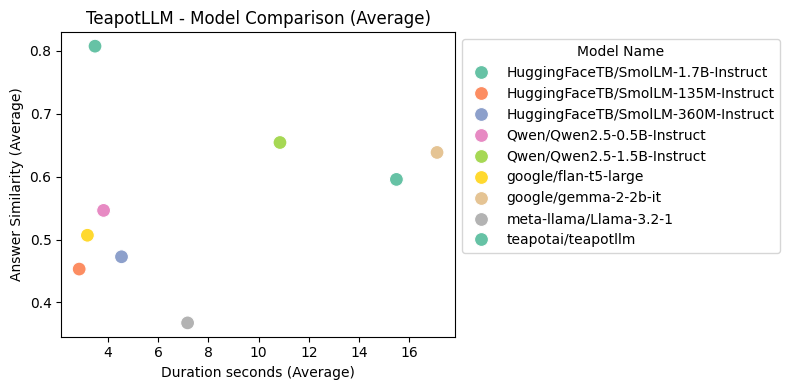

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'outputs' is already defined
outputs_df = pd.DataFrame(outputs)

# Define better question type names
TYPE_MAPPINGS = {
    "boolean": "True/False",
    "qa": "General QnA",
    "summarization": "Summarization",
    "unanswerable": "Hallucination Questions",
    "extraction": "Extraction"
}

outputs_df['Model Name'] = outputs_df['model_name']
outputs_df['Question Type'] = outputs_df['type'].apply(lambda t: TYPE_MAPPINGS[t])

# outputs_df = outputs_df[outputs_df['model_name'] != "google/flan-t5-base"]

# Group by 'model_name' and calculate the mean for 'similarity' and 'duration'
grouped_df = outputs_df.groupby("Model Name")[["similarity", "duration"]].mean().reset_index()

# Set up the plot
plt.figure(figsize=(8, 4))

# Use Seaborn scatterplot to plot the averages, with colors for different model names
sns.scatterplot(
    data=grouped_df,
    x='duration',  # Duration on the x-axis
    y='similarity',  # Similarity on the y-axis
    hue='Model Name',  # Color points by 'model_name'
    palette='Set2',  # Color palette for model names
    s=100,  # Size of points
    legend='full'  # Display the full legend
)

# Adjust the plot size and appearance
plt.title('TeapotLLM - Model Comparison (Average)')
plt.xlabel('Duration seconds (Average)')
plt.ylabel('Answer Similarity (Average)')

# Move the legend to the side (outside the plot)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Model Name")

# Ensure the layout is adjusted so everything fits
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-25-76ce9f6a05db>:29: UserWarning: The markers list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(


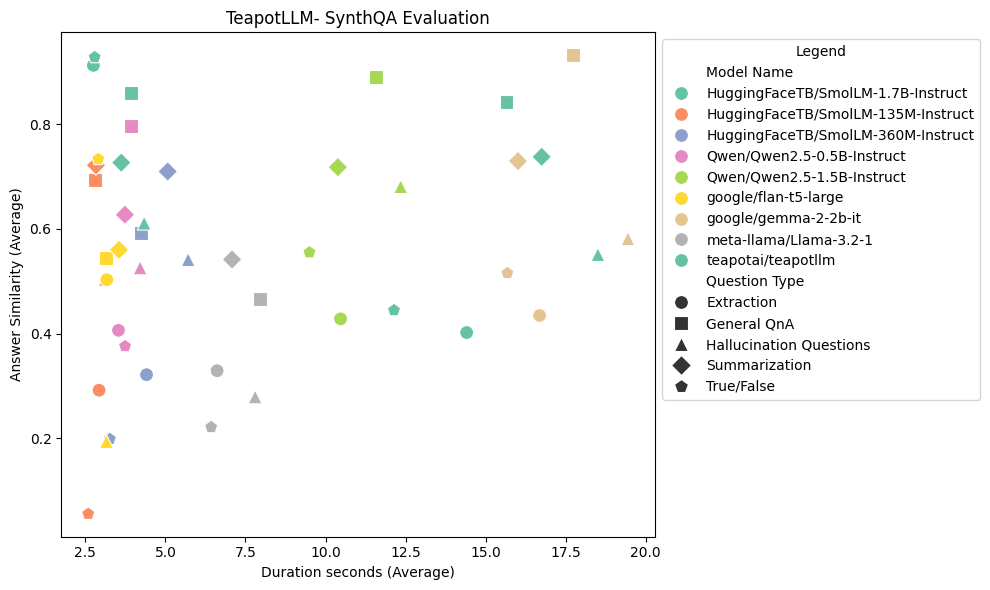

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'outputs' is already defined
outputs_df = pd.DataFrame(outputs)

# Define better question type names
TYPE_MAPPINGS = {
    "boolean":"True/False",
    "qa":"General QnA",
    "summarization":"Summarization",
    "unanswerable":"Hallucination Questions",
    "extraction":"Extraction"

}
outputs_df['Model Name'] = outputs_df['model_name']
outputs_df['Question Type'] = outputs_df['type'].apply(lambda t:TYPE_MAPPINGS[t])

outputs_df = outputs_df[outputs_df['model_name'] != "google/flan-t5-base"]

# Group by 'model_name' and 'type', then calculate the mean for 'similarity' and 'duration'
grouped_df = outputs_df.groupby(["Model Name", "Question Type"])[["similarity", "duration"]].mean().reset_index()

# Set up the plot
plt.figure(figsize=(10, 6))

# Use Seaborn scatterplot to plot 'duration' vs 'similarity', with colors for model and shape for question type
sns.scatterplot(
    data=grouped_df,
    x='duration',  # Now using 'duration' for the x-axis
    y='similarity',  # Now using 'similarity' for the y-axis
    hue='Model Name',  # Color points by 'model_name'
    style='Question Type',  # Use different markers for 'type'
    palette='Set2',  # Color palette for model names
    markers=['o', 's', '^', 'D', 'p', '*'],  # Custom markers for different types
    s=100,  # Size of points
    legend='full'  # Display the full legend
)

# Adjust the plot size and appearance
plt.title('TeapotLLM- SynthQA Evaluation')
plt.xlabel('Duration seconds (Average)')
plt.ylabel('Answer Similarity (Average)')

# Move the legend to the side (outside the plot)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Legend")

# Ensure the layout is adjusted so everything fits
plt.tight_layout()

# Show the plot
plt.show()


<ipython-input-40-f362573061a9>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=correct_df["model_name"], x=correct_df["correct_refusal_percentage"], palette=palette, ax=ax[0])
<ipython-input-40-f362573061a9>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=incorrect_df["model_name"], x=incorrect_df["incorrect_refusal_percentage"], palette=palette, ax=ax[1])


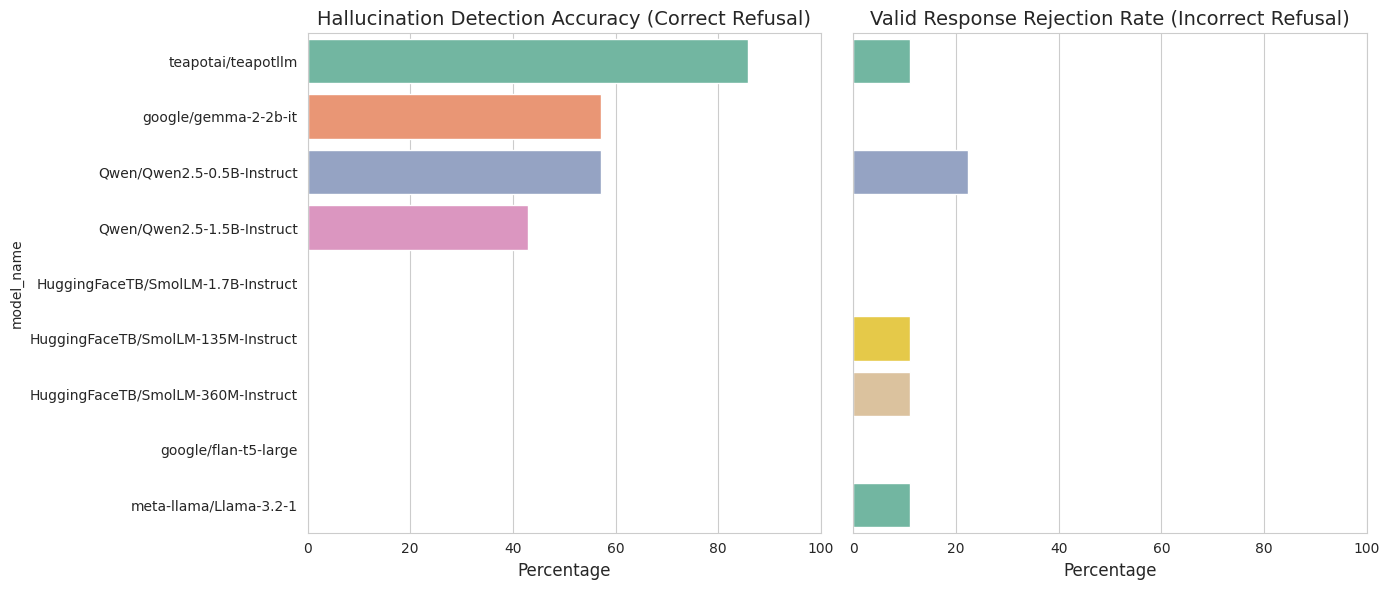

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Manually Annotated hallucination identification from traces
incorrect_refusal = [
    {"model_name": "HuggingFaceTB/SmolLM-1.7B-Instruct", "incorrect_refusal_percentage": 0.0},
    {"model_name": "HuggingFaceTB/SmolLM-135M-Instruct", "incorrect_refusal_percentage": 0.111111},
    {"model_name": "HuggingFaceTB/SmolLM-360M-Instruct", "incorrect_refusal_percentage": 0.111111},
    {"model_name": "Qwen/Qwen2.5-0.5B-Instruct", "incorrect_refusal_percentage": 0.222222},
    {"model_name": "Qwen/Qwen2.5-1.5B-Instruct", "incorrect_refusal_percentage": 0.0},
    {"model_name": "google/flan-t5-large", "incorrect_refusal_percentage": 0.0},
    {"model_name": "google/gemma-2-2b-it", "incorrect_refusal_percentage": 0.0},
    {"model_name": "meta-llama/Llama-3.2-1", "incorrect_refusal_percentage": 0.111111},
    {"model_name": "teapotai/teapotllm", "incorrect_refusal_percentage": 0.111111}
]

correct_refusal = [
    {"model_name": "HuggingFaceTB/SmolLM-1.7B-Instruct", "correct_refusal_percentage": 0.0},
    {"model_name": "HuggingFaceTB/SmolLM-135M-Instruct", "correct_refusal_percentage": 0.0},
    {"model_name": "HuggingFaceTB/SmolLM-360M-Instruct", "correct_refusal_percentage": 0.0},
    {"model_name": "Qwen/Qwen2.5-0.5B-Instruct", "correct_refusal_percentage": 0.571429},
    {"model_name": "Qwen/Qwen2.5-1.5B-Instruct", "correct_refusal_percentage": 0.428571},
    {"model_name": "google/flan-t5-large", "correct_refusal_percentage": 0.0},
    {"model_name": "google/gemma-2-2b-it", "correct_refusal_percentage": 0.571429},
    {"model_name": "meta-llama/Llama-3.2-1", "correct_refusal_percentage": 0.0},
    {"model_name": "teapotai/teapotllm", "correct_refusal_percentage": 0.857143}
]

# Creating DataFrames
incorrect_df = pd.DataFrame(incorrect_refusal)
correct_df = pd.DataFrame(correct_refusal)

# Sort correct refusal by highest value
correct_df = correct_df.sort_values(by="correct_refusal_percentage", ascending=False)

# Maintain the same order in incorrect refusal DataFrame
incorrect_df = incorrect_df.set_index("model_name").loc[correct_df["model_name"].values].reset_index()

# Convert percentages to 0-100 scale
correct_df["correct_refusal_percentage"] *= 100
incorrect_df["incorrect_refusal_percentage"] *= 100

# Set seaborn style and palette
sns.set_style("whitegrid")
palette = sns.color_palette("Set2", len(correct_df))

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.barplot(y=correct_df["model_name"], x=correct_df["correct_refusal_percentage"], palette=palette, ax=ax[0])
ax[0].set_title("Hallucination Detection Accuracy (Correct Refusal)", fontsize=14)
ax[0].set_xlabel("Percentage", fontsize=12)
ax[0].invert_yaxis()
ax[0].set_xlim(0, 100)

sns.barplot(y=incorrect_df["model_name"], x=incorrect_df["incorrect_refusal_percentage"], palette=palette, ax=ax[1])
ax[1].set_title("Valid Response Rejection Rate (Incorrect Refusal)", fontsize=14)
ax[1].set_xlabel("Percentage", fontsize=12)
ax[1].set_xlim(0, 100)

plt.tight_layout()
plt.show()
